# Import Library

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 58.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pandas
    Found exis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [410]:
df = pd.read_csv('marketing_campaign_data.csv')
pd.set_option('display.max_columns', None)

In [411]:
df1 = df.copy()

In [412]:
df1.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [413]:
# convert Dt_customer columns dtype to date
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], dayfirst=True)

#create age feature based on year_birth column and current year
import datetime
df1['age'] = datetime.datetime.now().year - df1['Year_Birth']

# create age group feature based on bappenas group age and simplified it (https://sepakat.bappenas.go.id/wiki/Kelompok_Usia)

def group_age(x):
  if x['age'] <= 45:
    group = 'dewasa'
  elif x['age'] >= 46 and x['age'] <= 64:
    group = 'paruh baya'
  else:
    group = 'usia lanjut'
  return group

df1['age_group'] = df1.apply(lambda x: group_age(x), axis = 1)

# create total children feature based on kidhome and teenhome columns
df1['total_children'] = df1['Kidhome'] + df1['Teenhome'] 

# create total spent feature based on MntCoke, MntFruits, MntMeatProduct, MntFishProducts, MntSweetProducts, MntGoldProds columns
df1['total_spent'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

# create total accepted campaign feature based on AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 columns
df1['total_accepted_cmp'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

#create total transactions columns 
df1['total_transactions'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

#create conversion rate based on NumWebVisitsMonth and total_transactions columns

def cvr(response, visit):
  if visit == 0:
    return 0
  return response / visit

df1['cvr'] = df1.apply(lambda x: cvr(x['total_transactions'], x['NumWebVisitsMonth']), axis = 1)

# create a column for how long the customer has been registered on the platform in days
from datetime import date
today = date.today()
today = pd.to_datetime(today)
df1['joined_in_days'] = today - df1['Dt_Customer']
df1['joined_in_days'] = df1['joined_in_days'].dt.days

# EDA

In [414]:
# drop unnecessary columns (Unnamed: 0 and ID, Year_Birth)
df1.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], axis = 1, inplace=True)

In [415]:
# descriptive statistics
df1.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_children,total_spent,total_accepted_cmp,total_transactions,cvr,joined_in_days
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196,0.950446,6.057982e+05,0.297768,14.862054,4.395222,3481.582143
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,6.022493e+05,0.678381,7.677173,4.913624,202.122512
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000,3128.000000
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222,3308.750000
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000,3483.500000
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000,3657.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,3.000000,2.525000e+06,4.000000,44.000000,43.000000,3827.000000


In [416]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntCoke              2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [417]:
# grouping cateogry columns and numerical columns

not_viz = ['Dt_Customer']
cats = ['Kidhome', 'Teenhome', 'Education', 'Marital_Status', 'age_group', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'total_accepted_cmp', 'total_children', 'Complain']
nums = []

for i in df1.columns:
  if i not in cats and i not in not_viz:
    nums.append(i)

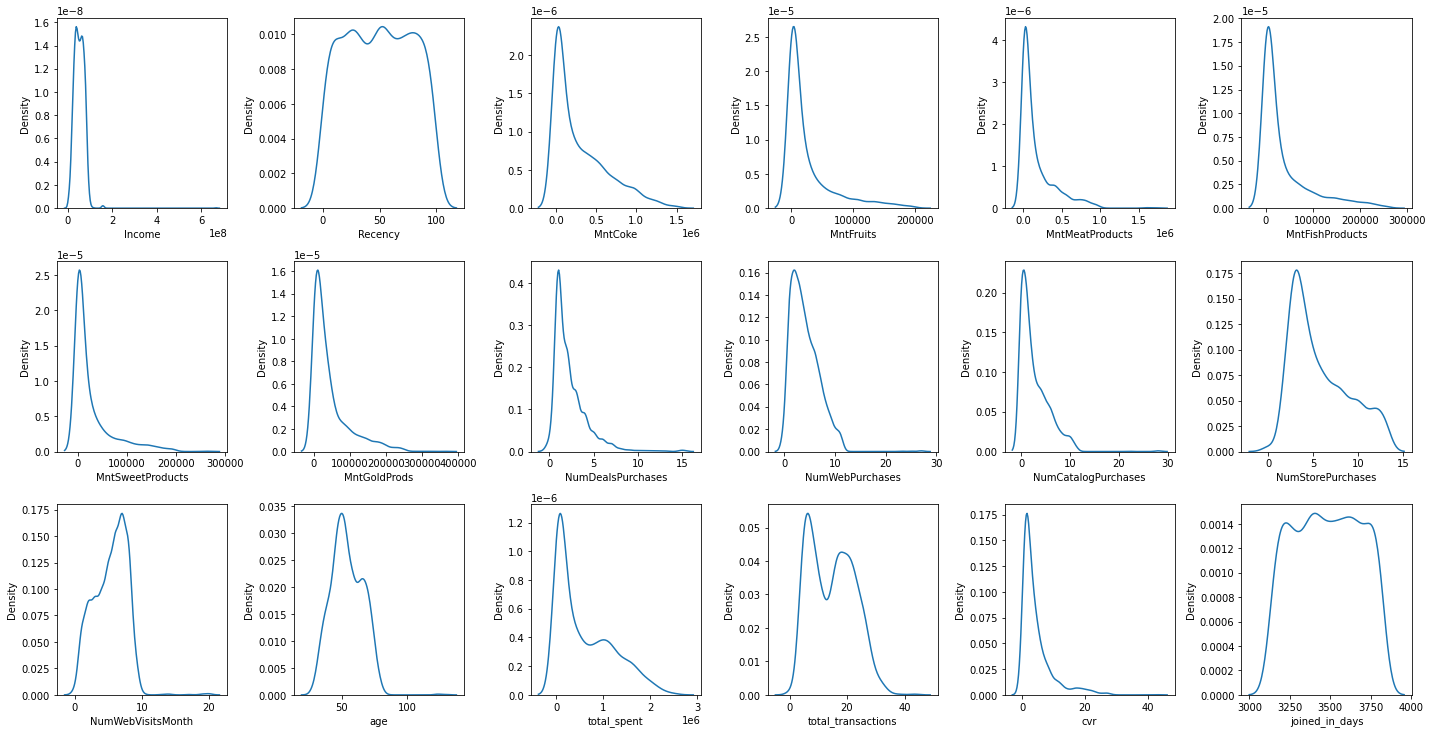

In [418]:
plt.figure(figsize= (20, 20))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.kdeplot(x = df1[nums[i]])
    plt.tight_layout()
plt.show()

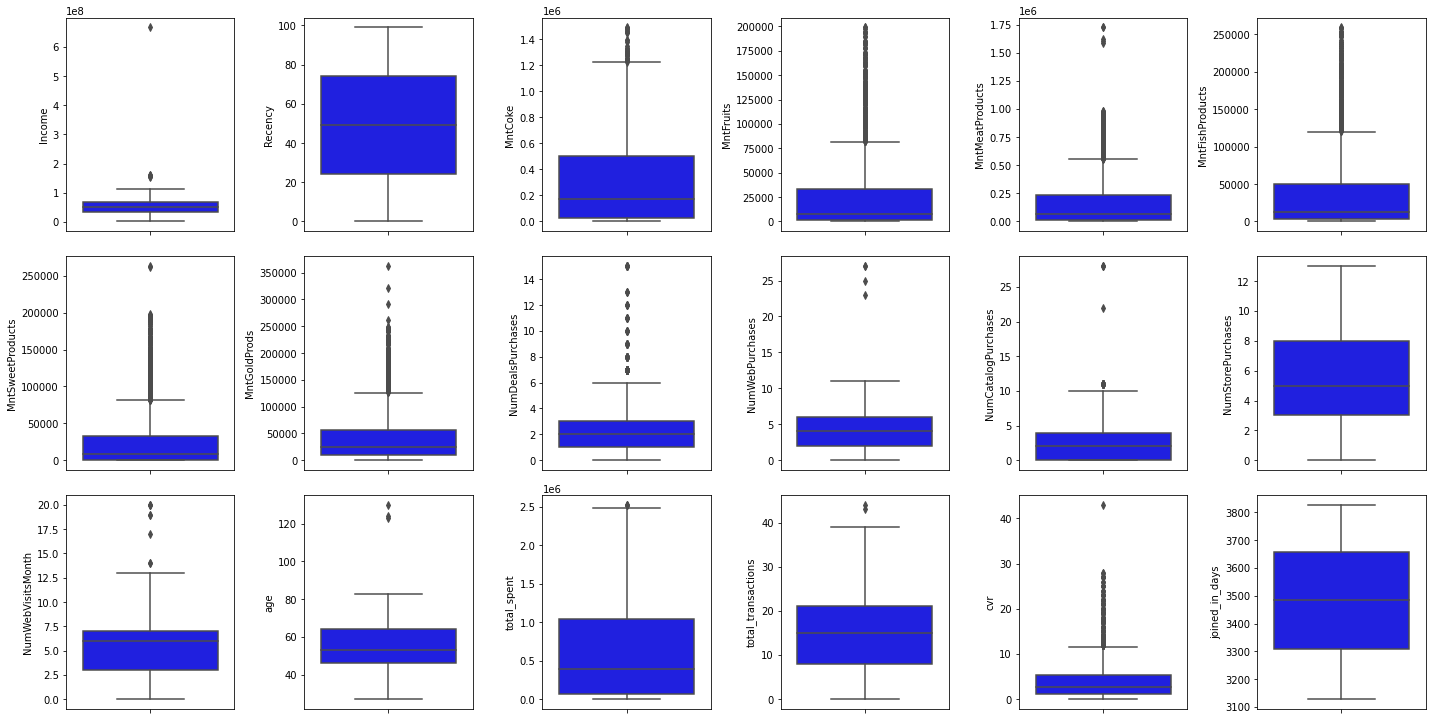

In [419]:
plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df1[nums[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

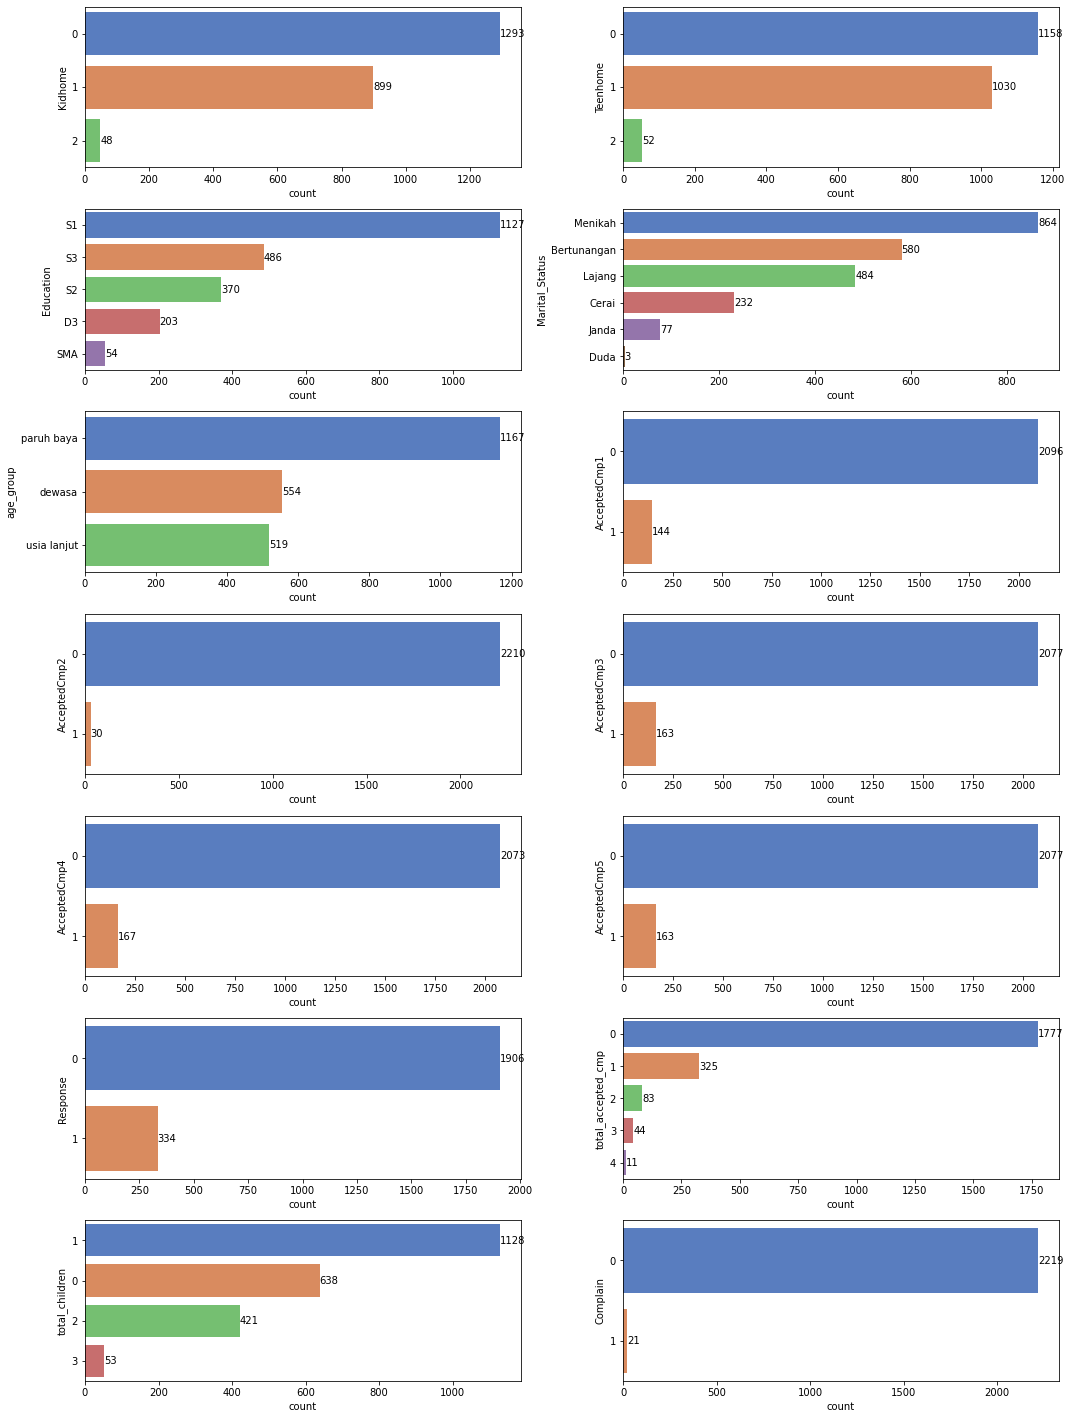

In [420]:
plt.figure(figsize=(15, 25))
for i in range(len(cats)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cats[i], data=df1, palette='muted', order=df1[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

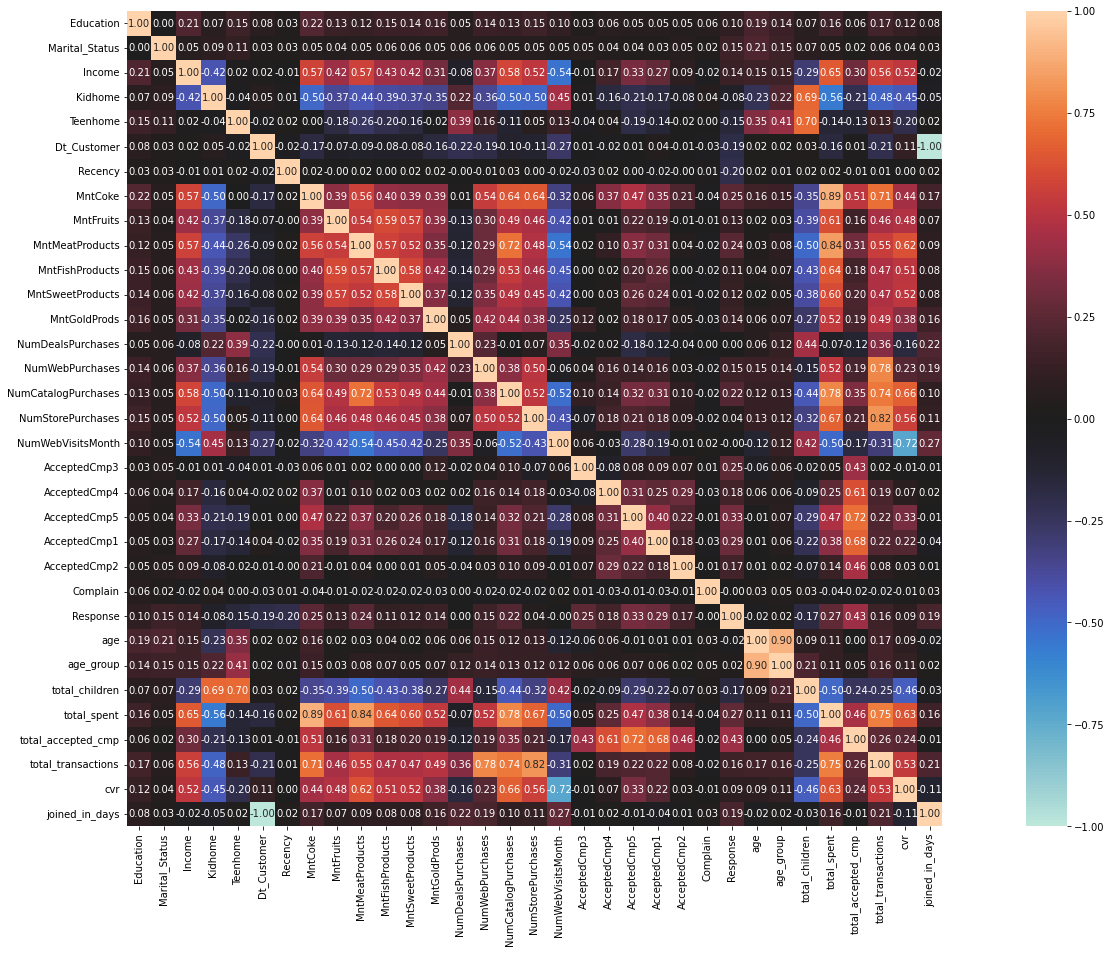

In [421]:
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(30, 15))
associations(df1, ax=ax);

In [422]:
df_task1 = df1.groupby('age_group').agg({'cvr' : 'sum'}).reset_index()
df_task1['sum_of_cvr'] = df_task1['cvr'].sum()
df_task1['pct'] = round((df_task1['cvr'] / df_task1['sum_of_cvr']) * 100, 2)
df_task1

,age_group,cvr,sum_of_cvr,pct
0,dewasa,2361.553006,9845.297974,23.99
1,paruh baya,4679.369175,9845.297974,47.53
2,usia lanjut,2804.375794,9845.297974,28.48


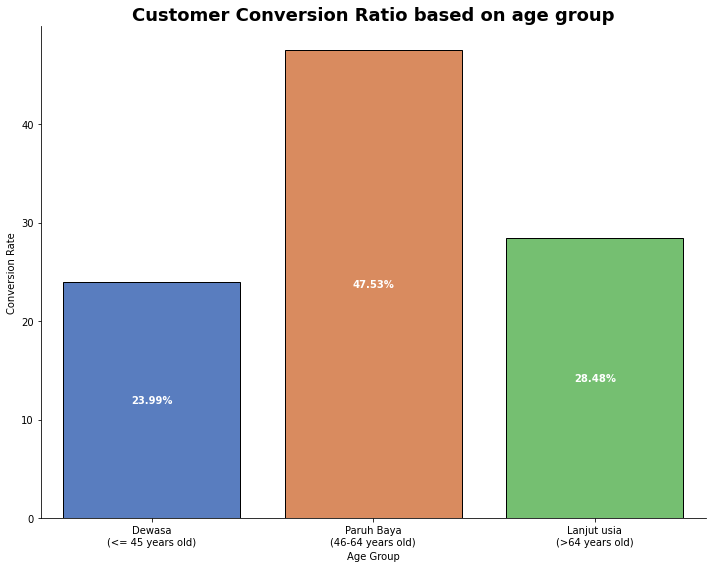

<Figure size 432x288 with 0 Axes>

In [423]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x = 'age_group', y = 'pct', data=df_task1, palette='muted', edgecolor='black')
plt.title('Customer Conversion Ratio based on age group', fontsize=18,fontweight='bold')

plt.xlabel('Age Group')
plt.xticks(np.arange(3), ['Dewasa\n(<= 45 years old)', 'Paruh Baya\n(46-64 years old)', 'Lanjut usia\n(>64 years old)'])
plt.ylabel('Conversion Rate')
plt.bar_label(ax.containers[0], ['23.99%', '47.53%', '28.48%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.show()
plt.savefig('cvr_age.png')

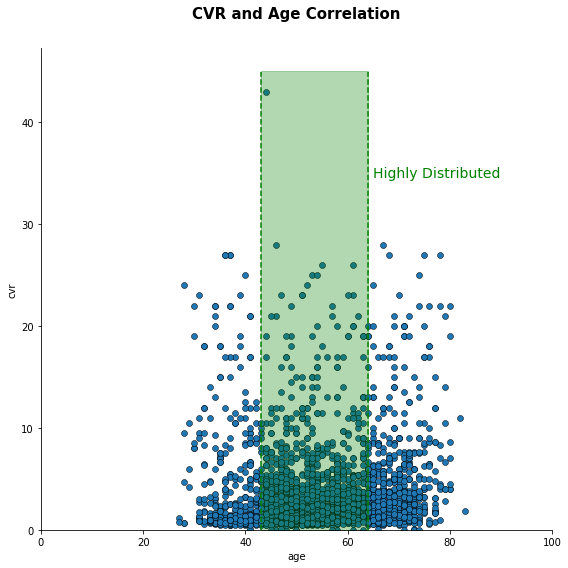

In [424]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df1, x='age', y='cvr', edgecolor='black')
plt.xlim(0, 100)

plt.title('CVR and Age Correlation', fontsize=15, color='black', weight='bold', pad=30)
plt.axvline(43, ls='--', color='green', ymax=0.95)
plt.axvline(64, ls='--', color='green', ymax=0.95)
plt.stackplot(np.arange(43,65), [[45]], color='green', alpha=0.3)
plt.text(x=65, y=35, s='Highly Distributed', fontsize=14, color='green', va='center')

sns.despine()
plt.tight_layout()
plt.show()

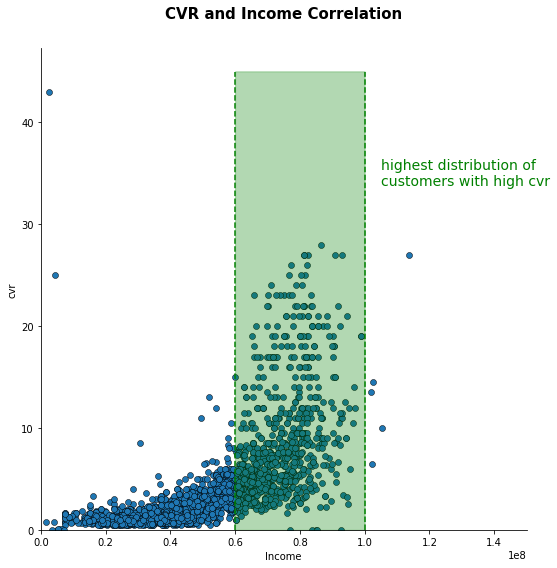

In [425]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df1, x='Income', y='cvr', edgecolor='black')
plt.xlim(0, 150000000)

plt.title('CVR and Income Correlation', fontsize=15, color='black', weight='bold', pad=30)
plt.axvline(60000000, ls='--', color='green', ymax=0.95)
plt.axvline(100000000, ls='--', color='green', ymax=0.95)
plt.stackplot(np.arange(60000000,100000000), [[45]], color='green', alpha=0.3)
plt.text(x=105000000, y=35, s='highest distribution of\ncustomers with high cvr', fontsize=14, color='green', va='center')

sns.despine()
plt.tight_layout()
plt.show()

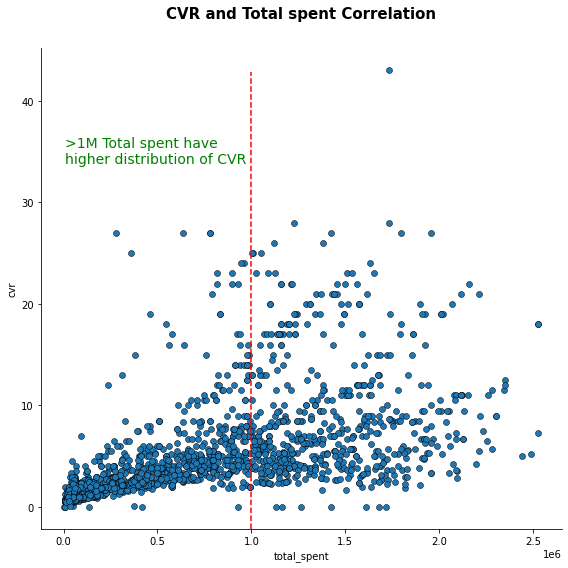

In [426]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df1, x='total_spent', y='cvr', edgecolor='black')

plt.title('CVR and Total spent Correlation', fontsize=15, color='black', weight='bold', pad=30)
plt.axvline(1000000, ls='--', color='red', ymax=0.95)
plt.text(x=10000, y=35, s='>1M Total spent have\nhigher distribution of CVR', fontsize=14, color='green', va='center')

sns.despine()
plt.tight_layout()
plt.show()

In [427]:
ttc = df1.groupby('total_children').agg({'total_spent' : 'sum'}).reset_index()
ttc

,total_children,total_spent
0,0,705647000
1,1,533243000
2,2,103544000
3,3,14554000


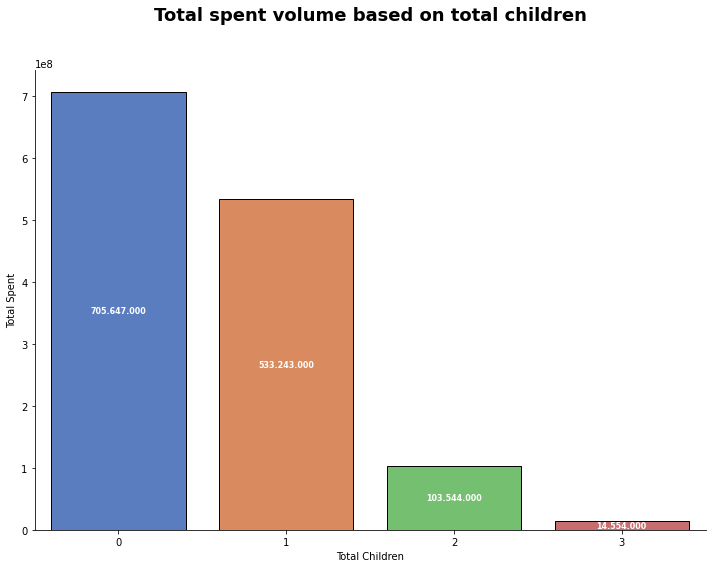

In [428]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='total_children', y = 'total_spent', data=ttc, palette='muted', edgecolor='black')
plt.title('Total spent volume based on total children', fontsize=18,fontweight='bold', pad=50)

plt.xlabel('Total Children')

plt.ylabel('Total Spent')
plt.bar_label(ax.containers[0], ['705.647.000', '533.243.000', '103.544.000', '14.554.000'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

# Data cleaning and preprocessing

In [429]:
#checking null values
counts = df1.isna().sum().sort_values(ascending=False)
#checking null values percentage
percentages = round(df1.isna().mean() * 100, 3).sort_values(ascending=False)
#concat 
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
Income,24,1.071
Education,0,0.000
age,0,0.000
AcceptedCmp4,0,0.000
AcceptedCmp5,0,0.000
AcceptedCmp1,0,0.000
AcceptedCmp2,0,0.000
Complain,0,0.000
Response,0,0.000
age_group,0,0.000


In [430]:
df1['Income']= df1['Income'].fillna(df1['Income'].median())

In [431]:
#checking null values
counts = df1.isna().sum().sort_values(ascending=False)
#checking null values percentage
percentages = round(df1.isna().mean() * 100, 3).sort_values(ascending=False)
#concat 
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
Education,0,0.0
NumWebVisitsMonth,0,0.0
cvr,0,0.0
total_transactions,0,0.0
total_accepted_cmp,0,0.0
total_spent,0,0.0
total_children,0,0.0
age_group,0,0.0
age,0,0.0
Response,0,0.0


In [432]:
#checking duplicated data
df1.duplicated().any()

True

In this case, we will use RFM analysis with a slight modification to help reduce the dimensionality of the data to be used as a model. By using the RFM analysis method, some of the columns used are :
- R : Recency
- F : total_transactions
- M : total_spent

Coupled with the age and joined_in_days column, so the columns that will be used when modeling are Recency, total_transactions, total_spent, age and joined_in_days.

In [433]:
df_rfm = df1[['Recency', 'total_transactions', 'total_spent', 'age', 'joined_in_days']]
df_rfm

,Recency,total_transactions,total_spent,age,joined_in_days
0,58,25,1617000,66,3791
1,38,6,27000,69,3241
2,26,21,776000,58,3440
3,26,8,53000,39,3267
4,94,19,422000,42,3289
...,...,...,...,...,...
2235,46,18,1341000,56,3509
2236,56,22,444000,77,3147
2237,91,19,1241000,42,3283
2238,8,23,843000,67,3284


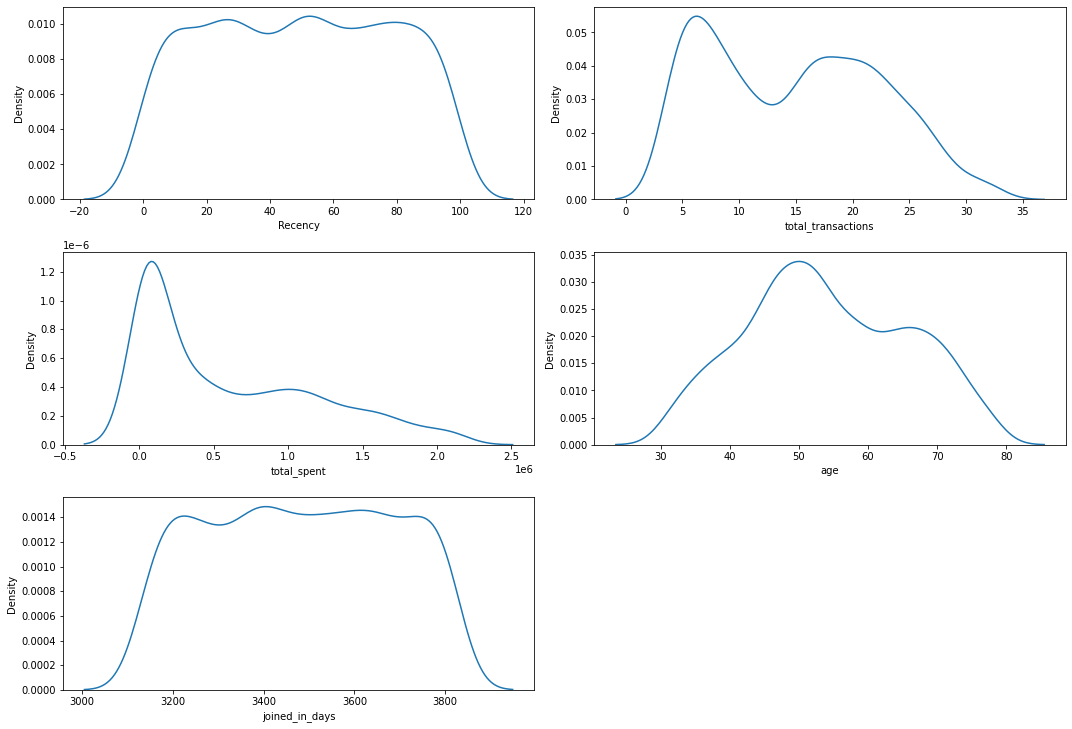

In [435]:
cols = df_rfm.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_rfm[cols[i]])
    plt.tight_layout()

<ipython-input-436-962eb7eced8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['total_spent_sqrt'] = np.sqrt(df_rfm['total_spent'])


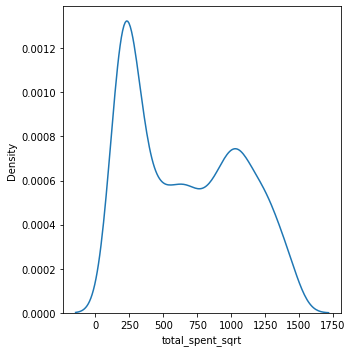

In [436]:
df_rfm['total_spent_sqrt'] = np.sqrt(df_rfm['total_spent'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rfm['total_spent_sqrt'])
plt.tight_layout()

In [437]:
df_rfm.skew()

Recency              -0.003495
total_transactions    0.211984
total_spent           0.822983
age                   0.097993
joined_in_days       -0.015246
total_spent_sqrt      0.277134
dtype: float64

In [438]:
df_rfm_final = df_rfm.copy()
df_rfm_final.drop(columns='total_spent', axis=1, inplace=True)

In [439]:
df_rfm_final

,Recency,total_transactions,age,joined_in_days,total_spent_sqrt
0,58,25,66,3791,1271.613149
1,38,6,69,3241,164.316767
2,26,21,58,3440,880.908622
3,26,8,39,3267,230.217289
4,94,19,42,3289,649.615271
...,...,...,...,...,...
2235,46,18,56,3509,1158.015544
2236,56,22,77,3147,666.333250
2237,91,19,42,3283,1114.001795
2238,8,23,67,3284,918.150314


In [440]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_std = StandardScaler().fit_transform(df_rfm_final)
df_std_rfm = pd.DataFrame(df_std, columns=list(df_rfm_final))
df_std_rfm

,Recency,total_transactions,age,joined_in_days,total_spent_sqrt
0,0.307439,1.336692,1.017522,1.532210,1.501743
1,-0.383574,-1.166701,1.274735,-1.191314,-1.231947
2,-0.798181,0.809662,0.331621,-0.205894,0.537173
3,-0.798181,-0.903186,-1.297394,-1.062566,-1.069252
4,1.551261,0.546147,-1.040181,-0.953625,-0.033843
...,...,...,...,...,...
2235,-0.107169,0.414389,0.160146,0.135785,1.221294
2236,0.238338,0.941420,1.960636,-1.656789,0.007430
2237,1.447609,0.546147,-1.040181,-0.983336,1.112633
2238,-1.420092,1.073177,1.103260,-0.978384,0.629115


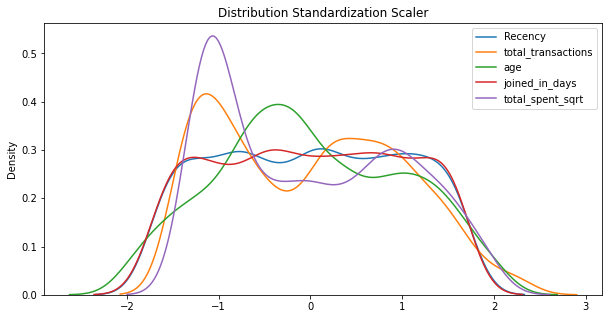

In [441]:
plt.figure(figsize=(10, 5))
plt.title('Distribution Standardization Scaler')
sns.kdeplot(df_std_rfm['Recency'], label = 'Recency')
sns.kdeplot(df_std_rfm['total_transactions'], label = 'total_transactions')
sns.kdeplot(df_std_rfm['age'], label = 'age')
sns.kdeplot(df_std_rfm['joined_in_days'], label = 'joined_in_days')
sns.kdeplot(df_std_rfm['total_spent_sqrt'], label = 'total_spent_sqrt')
plt.xlabel(None)
plt.legend()
plt.show()

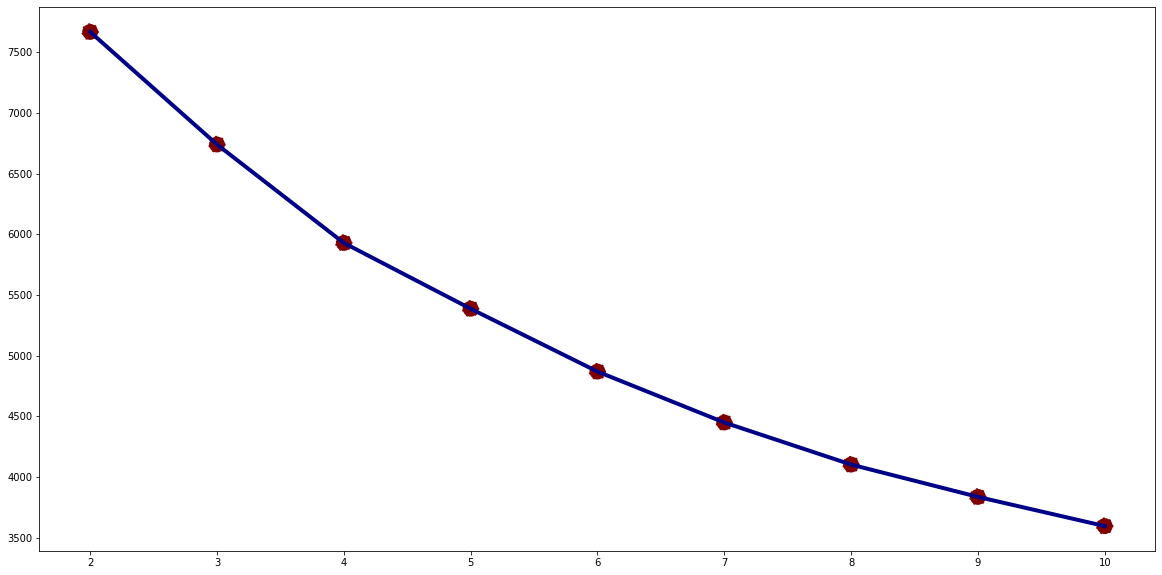

In [442]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_rfm)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [443]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    12.103987
1    12.044171
2     9.148637
3     9.621487
4     8.623979
5     7.799098
6     6.500843
7     6.277574
8          NaN
dtype: float64

In [444]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


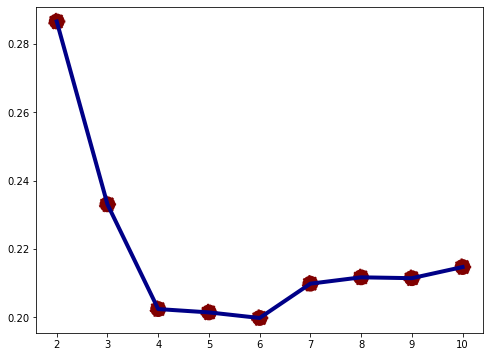

In [445]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_rfm)
    preds = kmeans.predict(df_std_rfm)
     
    score_euclidean = silhouette_score(df_std_rfm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

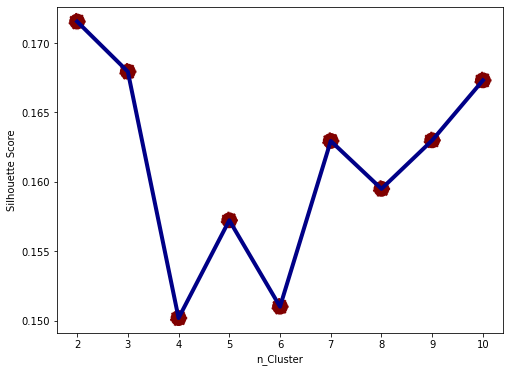

In [446]:
mahalanobis = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i).fit(df_std_rfm)
  preds = kmeans.predict(df_std_rfm)

  score_mahalanobis = silhouette_score(df_std_rfm,preds,metric='mahalanobis')
  mahalanobis.append(score_mahalanobis)

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=range(2,11), y=mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=mahalanobis, s=300, color='#800000',  linestyle='--')

plt.xlabel('n_Cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [447]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,11):
  labels=cluster.KMeans(n_clusters=i, init='k-means++', random_state=0).fit(df_std_rfm).labels_
  print("Silhoute score for k(clusters) = " + str(i) + " is " + str(metrics.silhouette_score(df_std_rfm,labels,metric='euclidean', sample_size=1000, random_state=42)))

Silhoute score for k(clusters) = 2 is 0.2838716238151357
Silhoute score for k(clusters) = 3 is 0.22812696811655314
Silhoute score for k(clusters) = 4 is 0.21074929853599947
Silhoute score for k(clusters) = 5 is 0.20525748149188777
Silhoute score for k(clusters) = 6 is 0.1988167767714056
Silhoute score for k(clusters) = 7 is 0.2064771192441848
Silhoute score for k(clusters) = 8 is 0.20806325542175716
Silhoute score for k(clusters) = 9 is 0.20899611399786397
Silhoute score for k(clusters) = 10 is 0.21469429520147224


In [448]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,11):
  labels=cluster.KMeans(n_clusters=i, init='k-means++', random_state=0).fit(df_std_rfm).labels_
  print("Silhoute score for k(clusters) = " + str(i) + " is " + str(metrics.silhouette_score(df_std_rfm,labels,metric='mahalanobis', sample_size=1000, random_state=42)))

Silhoute score for k(clusters) = 2 is 0.16907113148469743
Silhoute score for k(clusters) = 3 is 0.16454103282436108
Silhoute score for k(clusters) = 4 is 0.1562572758154148
Silhoute score for k(clusters) = 5 is 0.15995414545289682
Silhoute score for k(clusters) = 6 is 0.14967303262159656
Silhoute score for k(clusters) = 7 is 0.15906986451601154
Silhoute score for k(clusters) = 8 is 0.15804795688834766
Silhoute score for k(clusters) = 9 is 0.15934422103311988
Silhoute score for k(clusters) = 10 is 0.16772907861200706


In [449]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_std_rfm.values)

KMeans(n_clusters=3, random_state=0)

In [450]:
df_std_rfm['cluster'] = kmeans.labels_
df_rfm['cluster'] = kmeans.labels_
df_std_rfm.sample(5)

<ipython-input-450-c86fb9980fa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['cluster'] = kmeans.labels_


,Recency,total_transactions,age,joined_in_days,total_spent_sqrt,cluster
265,-0.659979,-0.507914,0.245883,0.586404,-0.896972,1
1626,-0.487225,0.809662,-0.182805,1.512402,0.942252,2
739,-0.798181,0.677904,-0.011330,1.660958,1.218094,2
1735,-0.107169,1.468450,1.274735,0.705249,1.390064,0
537,-1.040035,0.150874,0.160146,-1.087325,0.906567,2


In [451]:
from sklearn.decomposition import PCA 
#PCA dengan component = 2
pca = PCA(n_components=2)

pca.fit(df_std_rfm)
pcs = pca.transform(df_std_rfm)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

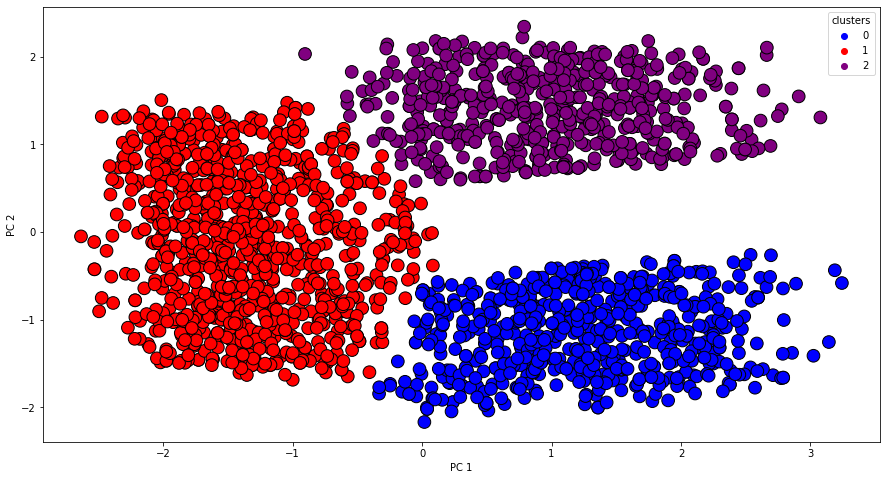

In [452]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=data_pca,
    palette=['blue','red','purple'],
    s=160,
    ax=ax
)
plt.show()

In [454]:
df_cluster = df_rfm.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster.drop(columns='total_spent_sqrt', axis = 1, inplace=True)
df_cluster

,Recency,total_transactions,total_spent,age,joined_in_days,cluster
0,58,25,1617000,66,3791,0
1,38,6,27000,69,3241,1
2,26,21,776000,58,3440,2
3,26,8,53000,39,3267,1
4,94,19,422000,42,3289,0
...,...,...,...,...,...,...
2235,46,18,1341000,56,3509,2
2236,56,22,444000,77,3147,0
2237,91,19,1241000,42,3283,0
2238,8,23,843000,67,3284,2


In [496]:
df_cluster.groupby('cluster').agg(['mean','median', 'max', 'min']).reset_index()

cluster    Recency                total_transactions                 \
                mean median max min               mean median max min   
0       0  73.433281   73.0  98  39          20.631083   20.0  32   4   
1       1  49.035503   49.0  98   0           7.718935    7.0  18   4   
2       2  22.901528   23.0  56   0          20.893039   21.0  32  10   

    total_spent                                   age                 \
           mean    median      max     min       mean median max min   
0  1.029903e+06  988000.0  2126000  199000  57.660911   58.0  78  31   
1  9.271105e+04   62500.0   461000   13000  51.328402   50.0  78  31   
2  1.023864e+06  981000.0  2126000  215000  55.142615   54.0  78  31   

  joined_in_days                      
            mean  median   max   min  
0    3540.642072  3562.0  3819  3135  
1    3438.024655  3423.0  3819  3135  
2    3492.684211  3497.0  3819  3135

In [497]:
df1.groupby('cluster').agg(['mean','median', 'max', 'min']).reset_index()

<ipython-input-497-39fcf9d23599>:1: FutureWarning: ['Education', 'Marital_Status', 'age_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1.groupby('cluster').agg(['mean','median', 'max', 'min']).reset_index()


cluster        Income                                       Kidhome         \
                   mean      median          max        min      mean median   
0       0  6.530199e+07  65569000.0  157243000.0  7144000.0  0.182104    0.0   
1       1  3.589509e+07  34582500.0  666666000.0  1730000.0  0.768245    1.0   
2       2  6.624461e+07  67087000.0  160803000.0  2447000.0  0.169779    0.0   

           Teenhome                                  Dt_Customer             \
  max min      mean median max min                          mean     median   
0   2   0  0.568289    1.0   2   0 2013-05-12 07:41:09.701726976 2013-04-21   
1   2   0  0.459566    0.0   2   0 2013-08-22 23:40:07.100591872 2013-09-07   
2   2   0  0.519525    0.0   2   0 2013-06-29 07:49:24.346349824 2013-06-25   

                           Recency                       MntCoke            \
         max        min       mean median max min           mean    median   
0 2014-06-28 2012-07-30  73.445840   73.0  99  39  527254.317111  471000.0   
1 2014-06-29 2012-08-01  49.044379   49.0  99   0   39270.216963   20000.0   
2 2014-06-29 2012-07-31  22.901528   23.0  56   0  518056.027165  454000.0   

                     MntFruits                      MntMeatProducts            \
       max   min          mean   median     max min            mean    median   
0  1493000  7000  42742.543171  27000.0  194000   0   285990.580848  206000.0   
1   298000     0   4889.546351   2000.0   65000   0    21571.992110   14000.0   
2  1478000  1000  45385.398981  26000.0  199000   0   288485.568761  207000.0   

                  MntFishProducts                      MntSweetProducts  \
       max    min            mean   median     max min             mean   
0  1607000  15000    62260.596546  39000.0  258000   0     46182.103611   
1   168000      0     6930.966469   3000.0   73000   0      5097.633136   
2  1725000   3000    63444.821732  42000.0  259000   0     44200.339559   

                        MntGoldProds                      NumDealsPurchases  \
    median     max min          mean   median     max min              mean   
0  29000.0  196000   0  68522.762951  52000.0  291000   0          2.679749   
1   2000.0   66000   0  14874.753452   9000.0  262000   0          1.941815   
2  27000.0  263000   0  67702.886248  45000.0  362000   0          2.601019   

                 NumWebPurchases                NumCatalogPurchases         \
  median max min            mean median max min                mean median   
0    2.0  15   0        5.690738    5.0  23   0            4.456829    4.0   
1    2.0  15   0        2.018738    2.0   7   0            0.538462    0.0   
2    2.0  15   0        5.904924    6.0  27   0            4.376910    4.0   

          NumStorePurchases                NumWebVisitsMonth                 \
  max min              mean median max min              mean median max min   
0  22   0          7.832025    8.0  13   0          4.489796    5.0   9   0   
1   5   0          3.189349    3.0   8   0          6.358974    7.0  20   0   
2  28   0          8.059423    8.0  13   0          4.415959    4.0  10   0   

  AcceptedCmp3                AcceptedCmp4                AcceptedCmp5         \
          mean median max min         mean median max min         mean median   
0     0.064364    0.0   1   0     0.135008    0.0   1   0     0.128728    0.0   
1     0.070020    0.0   1   0     0.012821    0.0   1   0     0.000000    0.0   
2     0.086587    0.0   1   0     0.115450    0.0   1   0     0.137521    0.0   

          AcceptedCmp1                AcceptedCmp2                 Complain  \
  max min         mean median max min         mean median max min      mean   
0   1   0     0.102041    0.0   1   0     0.025118    0.0   1   0  0.009419   
1   0   0     0.001972    0.0   1   0     0.001972    0.0   1   0  0.011834   
2   1   0     0.130730    0.0   1   0     0.020374    0.0   1   0  0.005093   

                  Response                     

In [462]:
df_total_cluster = df_cluster.groupby('cluster').agg({'Recency' : 'count'}).reset_index()
df_total_cluster.rename(columns={'Recency':'total_customers'}, inplace=True) 
df_total_cluster['sum_of_customers'] = df_total_cluster['total_customers'].sum()
df_total_cluster['pct'] = round((df_total_cluster['total_customers'] / df_total_cluster['sum_of_customers']) * 100, 2)
df_total_cluster

,cluster,total_customers,sum_of_customers,pct
0,0,637,2240,28.44
1,1,1014,2240,45.27
2,2,589,2240,26.29


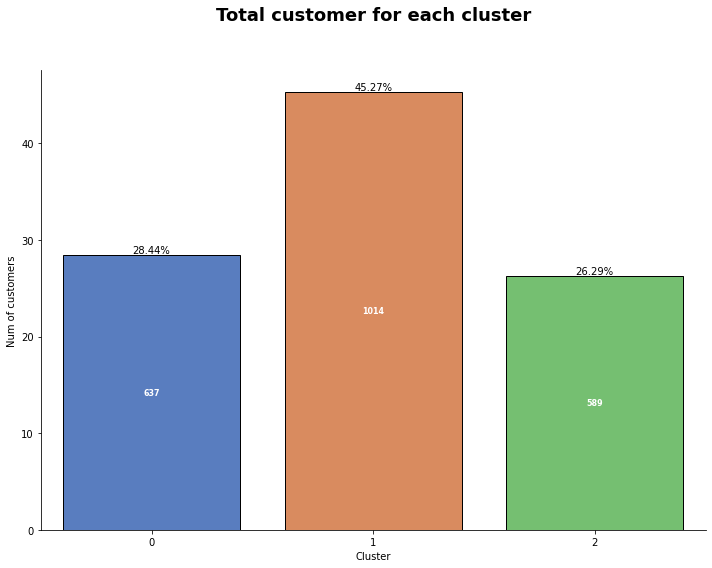

In [486]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='cluster', y = 'pct', data=df_total_cluster, palette='muted', edgecolor='black')
plt.title('Total customer for each cluster', fontsize=18,fontweight='bold', pad=50)

plt.xlabel('Cluster')

plt.ylabel('Num of customers')
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[0], ['637', '1014', '589'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

In [469]:
df1['cluster'] = kmeans.labels_
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,age_group,total_children,total_spent,total_accepted_cmp,total_transactions,cvr,joined_in_days,cluster
0,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,66,usia lanjut,0,1617000,0,25,3.571429,3791,0
1,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,69,usia lanjut,2,27000,0,6,1.200000,3241,1
2,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,58,paruh baya,0,776000,0,21,5.250000,3440,2
3,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,39,dewasa,1,53000,0,8,1.333333,3267,1
4,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,42,dewasa,1,422000,0,19,3.800000,3289,0


In [475]:
df_cluster_by_age_group = df1.groupby(['cluster', 'age_group']).agg({'age' : 'count'}).reset_index()
df_cluster_by_age_group.rename(columns={'age' : 'total_customers'}, inplace=True)
df_cluster_by_age_group['sum_of_customers'] = df_cluster_by_age_group['total_customers'].sum()
df_cluster_by_age_group['pct'] = round((df_cluster_by_age_group['total_customers'] / df_cluster_by_age_group['sum_of_customers']) * 100, 2)
df_cluster_by_age_group

,cluster,age_group,total_customers,sum_of_customers,pct
0,0,dewasa,101,2240,4.51
1,0,paruh baya,316,2240,14.11
2,0,usia lanjut,220,2240,9.82
3,1,dewasa,324,2240,14.46
4,1,paruh baya,542,2240,24.20
5,1,usia lanjut,148,2240,6.61
6,2,dewasa,129,2240,5.76
7,2,paruh baya,309,2240,13.79
8,2,usia lanjut,151,2240,6.74


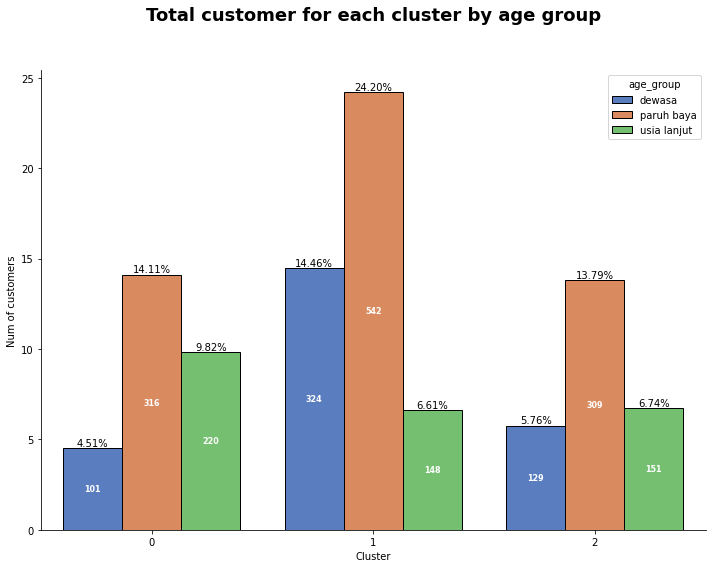

In [487]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='cluster', y = 'pct', hue= 'age_group', data=df_cluster_by_age_group, palette='muted', edgecolor='black')
plt.title('Total customer for each cluster by age group', fontsize=18,fontweight='bold', pad=50)

plt.xlabel('Cluster')

plt.ylabel('Num of customers')
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[0], ['101', '324', '129'], label_type='center', color='white', weight='bold', fontsize=8)

plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.bar_label(ax.containers[1], ['316', '542', '309'], label_type='center', color='white', weight='bold', fontsize=8)

plt.bar_label(ax.containers[2], fmt='%.2f%%')
plt.bar_label(ax.containers[2], ['220', '148', '151'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

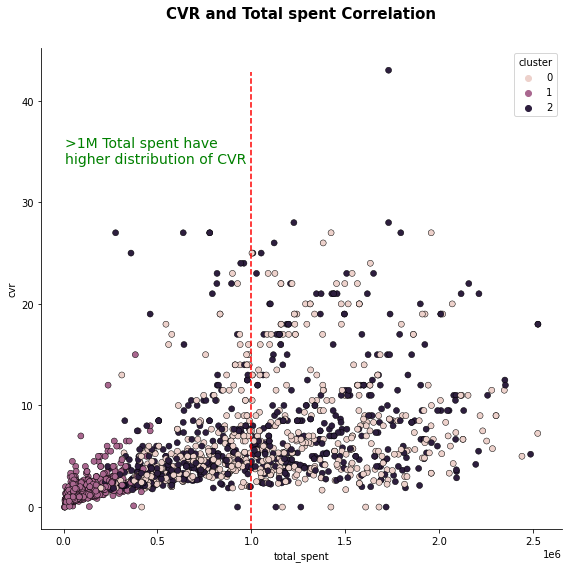

In [492]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df1, x='total_spent', y='cvr', hue='cluster', edgecolor='black')

plt.title('CVR and Total spent Correlation', fontsize=15, color='black', weight='bold', pad=30)
plt.axvline(1000000, ls='--', color='red', ymax=0.95)
plt.text(x=10000, y=35, s='>1M Total spent have\nhigher distribution of CVR', fontsize=14, color='green', va='center')

sns.despine()
plt.tight_layout()
plt.show()

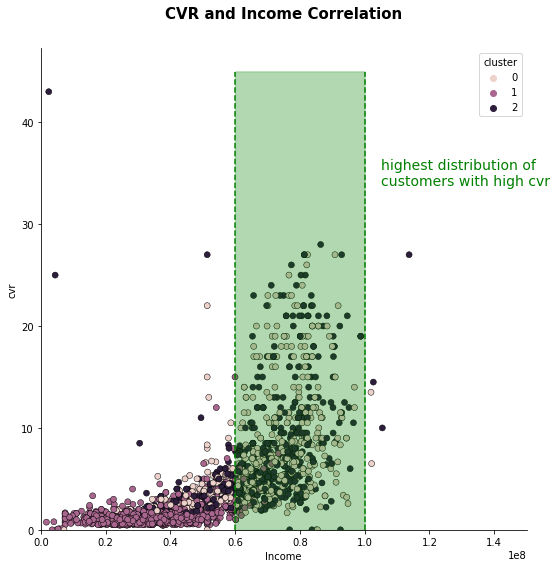

In [493]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df1, x='Income', y='cvr', hue='cluster', edgecolor='black')
plt.xlim(0, 150000000)

plt.title('CVR and Income Correlation', fontsize=15, color='black', weight='bold', pad=30)
plt.axvline(60000000, ls='--', color='green', ymax=0.95)
plt.axvline(100000000, ls='--', color='green', ymax=0.95)
plt.stackplot(np.arange(60000000,100000000), [[45]], color='green', alpha=0.3)
plt.text(x=105000000, y=35, s='highest distribution of\ncustomers with high cvr', fontsize=14, color='green', va='center')

sns.despine()
plt.tight_layout()
plt.show()